# All imports necessary

In [1]:
import pandas as pd
import numpy as np

import inspect

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [39]:
%matplotlib inline

# Read the data

Вычитаем данные в память:

In [2]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv')

Попробуем вывести шапку, глянуть, все ли нормально прочиталось:

In [3]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"    41188 non-null object
dtypes: object(1)
memory usage: 321.9+ KB


Мешанина какая-то.

Вообще говоря, это произошло потому, что (как вы, возможно заметили) pandas не стал вдумываться в то, что служит в качестве разделителя значений в строке.

Глянем на дефолтные значения параметров метода pd.read_csv:

In [5]:
signature = inspect.signature(pd.read_csv)

for k, v in signature.parameters.items():
    if v.default is not inspect.Parameter.empty and v.default is not None:
        print('Parameter: ', k, ' Default value: ', v.default)

Parameter:  sep  Default value:  ,
Parameter:  header  Default value:  infer
Parameter:  squeeze  Default value:  False
Parameter:  mangle_dupe_cols  Default value:  True
Parameter:  skipinitialspace  Default value:  False
Parameter:  keep_default_na  Default value:  True
Parameter:  na_filter  Default value:  True
Parameter:  verbose  Default value:  False
Parameter:  skip_blank_lines  Default value:  True
Parameter:  parse_dates  Default value:  False
Parameter:  infer_datetime_format  Default value:  False
Parameter:  keep_date_col  Default value:  False
Parameter:  dayfirst  Default value:  False
Parameter:  iterator  Default value:  False
Parameter:  compression  Default value:  infer
Parameter:  decimal  Default value:  b'.'
Parameter:  quotechar  Default value:  "
Parameter:  quoting  Default value:  0
Parameter:  error_bad_lines  Default value:  True
Parameter:  warn_bad_lines  Default value:  True
Parameter:  skipfooter  Default value:  0
Parameter:  doublequote  Default value

И первым же параметром идет, собственно, разделитель, дефолтное значение которого нам не подходит.

Поменяем его и случится счастье:

In [6]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv', sep=';')

Заметили, что выводятся не все столбцы?

Временами это раздражает.

Тут есть два варианта:
- транспонировать вывод метода pd.head();
- поменять дефолтные значения параметров библиотеки pandas, отвечающие за то, как данные отображаются.

Итак, вариант номер раз:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Вариант номер два:

In [9]:
default_columns_count = pd.options.display.max_columns

In [10]:
default_columns_count

20

In [11]:
pd.options.display.max_columns = 21

In [12]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
pd.options.display.max_columns = default_columns_count

Pandas также позволяет конфиурировать максимальное количество строк для вывода, ширину ячеек, точность вывода чисел с плавающей запятой и [Многое другое](https://pandas.pydata.org/pandas-docs/stable/options.html).

Также стоит время от времени поглядывать на курсы типа [вот этого](https://www.tutorialspoint.com/python_pandas/index.htm).

Не панацея, но может пригодиться.

Нередко данные сопровождаются каким-нибудь описанием.

Правилом хорошего тона является ввести в курс дела, вообще рассказать о том, что это за данные, откуда они взялись, как они собирались, осуществлялась ли какая-то их предобработка.

Не всегда и не на все вопросы есть ответы.

В данном случае у нас есть файлик с описанием признаков:

In [14]:
with open('../data/datasets/TS_Summer_2018/description.txt', 'r') as desc_f:
    for line in desc_f:
        print(line)

﻿Attribute information:





   Input variables:

   # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical)

   3 - marital : marital status (categorical,note: "divorced" means divorced or widowed)

   4 - education (categorical)

   5 - default: has credit in default? (categorical)

   6 - housing: has housing loan? (categorical)

   7 - loan: has personal loan? (categorical)



   # related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical) 

   9 - month: last contact month of year (categorical)

  10 - day_of_week: last contact day of the week (categorical)

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should 

Уже что-то.

Знаем, что:
- в нашем распоряжении 20 признаков:
- из них половина - вещественные;
- как минимум один из признаков нет смысла рассматривать в качестве предиктора в модели (очевидно, что если клиент на звонок не ответил, то его ответ "no", да и после звонка оператора тоже понятно, каков ответ клиента, однако на момент, когда клиенту еще не звонили, мы не знаем продолжительность звонка).

# Univariate analysis

Ладно, данные прочитали, посмотрели, сколько столбцов (признаков), примерно поняли, что это за признаки.

Дальше что?

Ну надо бы глянуть теперь для начала на каждый из этих признаков по отдельности.

Зачем?

Как минимум, чтобы понять:
- сколько в данных вещественных признаков;
- сколько в данных категориальных признаков;
- на каком количестве категориальных признаков установлено отношение порядка;
- есть ли среди категориальных признаков бинарные;
- как распределены признаки;
- есть ли отчетливо различимые выбросы;
- как соотносятся отдельно взятые признаки с целевой переменной, значение которой нам надо предсказывать;
- и т.д.

## Separate features description

Из предыдущей лекции (да наверняка и из своего опыта) вы знаете, что есть такой прекрасный метод в pandas как describe:

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Думаю, ни для кого не секрет, что и по отдельности можно с пеомощью этого метода глянуть на описательные статистики:

In [16]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Тем не менее, в ряде случаев этого бывает недостаточно и нужно формировать более подробное описание.

Для такой ситуации добрые люди написали PandasProfiling.

Собственно, это библиотечка, которая в одну строку позволяет получить довольно подробное описание данных:

In [17]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


Как вы видите, профайлер для каждого признака определил, является ли он вещественным или категориальным и соответствующим образом сформировал отчет по описательным статистикам.

Очень здорово, однако бывает так, что хотелось бы этими мета-данными как-то поманипулировать.

Например, есть набор данных, в нем какое-то количество признаков и надо взять только те, которые, предположим:
- являются вещественными\категориальными;
- содержат не больше {скольки-то}% пропусков.

Для этого данный отчет можно получить в слегка иной форме:

In [18]:
profiling_report = pandas_profiling.ProfileReport(data)

In [19]:
type(profiling_report)

pandas_profiling.ProfileReport

In [20]:
dir(profiling_report)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'description_set',
 'file',
 'get_description',
 'get_rejected_variables',
 'html',
 'to_file',
 'to_html']

Смотрите-ка, есть тут кое что интересное, в частности все, что идет после поля \_repr_html_.

глянем, что оттуда можно выцепить:

In [21]:
type(profiling_report.get_description())

dict

In [22]:
profiling_report.get_description().keys()

dict_keys(['table', 'variables', 'freq', 'correlations'])

In [23]:
type(profiling_report.get_description()['table'])

dict

In [24]:
profiling_report.get_description()['table'].keys()

dict_keys(['n', 'nvar', 'total_missing', 'n_duplicates', 'memsize', 'recordsize', 'NUM', 'DATE', 'CONST', 'CAT', 'UNIQUE', 'CORR', 'RECODED', 'BOOL', 'UNSUPPORTED', 'REJECTED'])

In [25]:
for k, v in profiling_report.get_description()['table'].items():
    print(k, v)

n 41188
nvar 21
total_missing 0.0
n_duplicates 12
memsize 6.6 MiB
recordsize 168.0 B
NUM 8
DATE 0
CONST 0
CAT 11
UNIQUE 0
CORR 2
RECODED 0
BOOL 0
UNSUPPORTED 0
REJECTED 2


In [26]:
type(profiling_report.get_description()['variables'])

pandas.core.frame.DataFrame

In [27]:
profiling_report.get_description()['variables']

,type,correlation_var,correlation,count,distinct_count,p_missing,n_missing,p_infinite,n_infinite,is_unique,...,iqr,kurtosis,skewness,sum,mad,cv,n_zeros,p_zeros,histogram,mini_histogram
age,NUM,NaN,NaN,41188,78,0,0,0,0,False,...,15,0.791312,0.784697,1648511,8.46154,0.260375,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
campaign,NUM,NaN,NaN,41188,42,0,0,0,0,False,...,2,36.9798,4.76251,105754,1.63421,1.07884,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
cons.conf.idx,NUM,NaN,NaN,41188,26,0,0,0,0,False,...,6.3,-0.358558,0.30318,-1.66822e+06,3.93826,-0.114269,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
cons.price.idx,NUM,NaN,NaN,41188,26,0,0,0,0,False,...,0.919,-0.829809,-0.230888,3.85419e+06,0.50981,0.0061858,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
contact,CAT,NaN,NaN,41188,2,0,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,CAT,NaN,NaN,41188,5,0,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,CAT,NaN,NaN,41188,3,0,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NUM,NaN,NaN,41188,1544,0,0,0,0,False,...,217,20.2479,3.26314,10638243,171.666,1.00385,4,9.71157e-05,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
education,CAT,NaN,NaN,41188,8,0,0,0,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NUM,NaN,NaN,41188,10,0,0,0,0,False,...,3.2,-1.06263,-0.724096,3372.7,1.42284,19.1848,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


In [28]:
type(profiling_report.get_description()['freq'])

dict

In [29]:
profiling_report.get_description()['freq'].keys()

dict_keys(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'])

In [30]:
for _, v in profiling_report.get_description()['freq'].items():
    print(type(v))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [31]:
type(profiling_report.get_description()['correlations'])

dict

In [32]:
profiling_report.get_description()['correlations'].keys()

dict_keys(['pearson', 'spearman'])

In [33]:
profiling_report.get_rejected_variables()

['euribor3m', 'nr.employed']

Итак, у нас уже есть довольно неплохое представление о данных, мы получили набор мета-данных о наших данных, где описаны типы признаков, количество пропусков и много разных других описательных статистик.

Все замечательно, но стоит помнить об одном минусе: сбор такого отчета крайне ресурсоемкий, если речь идет о больших данных.

Речь даже не о сотнях ТБ, PandasProfiling начнет себя плохо чувствовать даже уже ГБ на 8, поэтому его использование оправдано далеко не всегда.

Тем не менее мы пока придержим собранный отчет, он еще чуть ниже пригодится.

## Target analysis

Здесь имеется в виду:
- как распределена целевая переменная;
- как она связана с другими признаками по отдельности;
- есть ли статистически значимые отличия в характеристиках подвыборок с разными значениями целевой;
- и т. д.

Гланем для начала, как вообще записи распределены по целевой переменной:

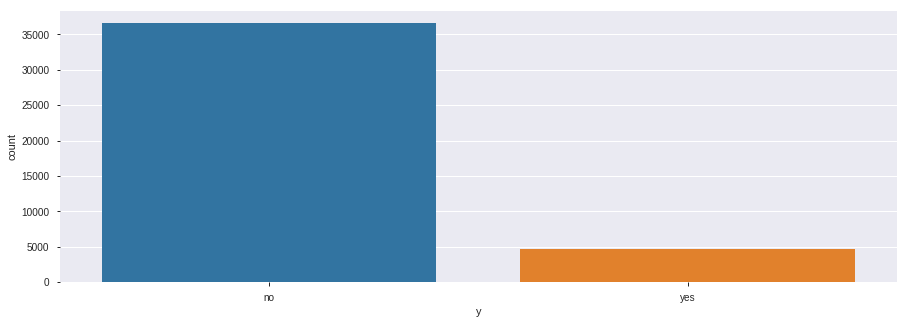

In [66]:
plt.figure(figsize=(15, 5))
sns.countplot(x='y', data=data, )
plt.show()

Классы очень сильно несбалансированы.

Конечно же, на качество классификации это положительно НЕ повлияет.

Посмотрим теперь по отдельности на каждый признак.

### Continuous features

Дернем из отчета все вещественные признаки и пойдем по очереди их рассматривать:

In [46]:
continuous_features = profiling_report.get_description()['variables'][profiling_report.get_description()['variables'].type == 'NUM'].index.values

In [50]:
len(continuous_features)

8

#### Age

Сначала просто посмотрим на то, как клиенты распределены по возрасту (возьмем 10 бинов, чтобы гистограмма не получилась сильно дерганой):

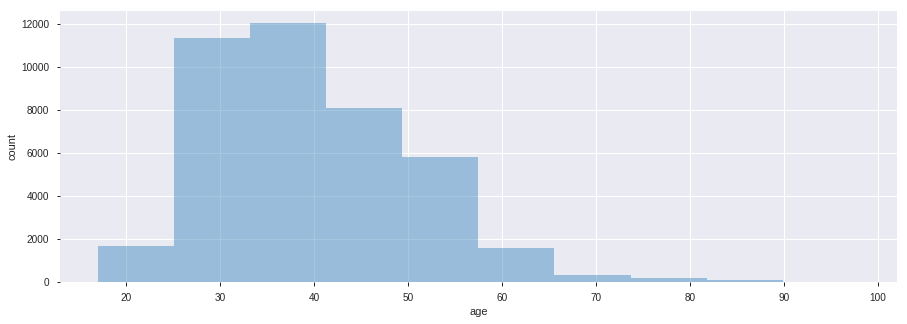

In [99]:
plt.figure(figsize=(15, 5))
sns.distplot(data[continuous_features[0]], bins=10, kde=False)
plt.ylabel('count')
plt.show()

Не особо радужая картина, распределение дерганое, никакого намека на нормальность, следовательно вариант использования t- и z- тестов для проверки статистически значимых различий среднего возраста в разных группах уже отпадает.

Глянем, можно ли визуально отличить распределение возрастов в группах с положительным и отрицательным значениям признака "y":

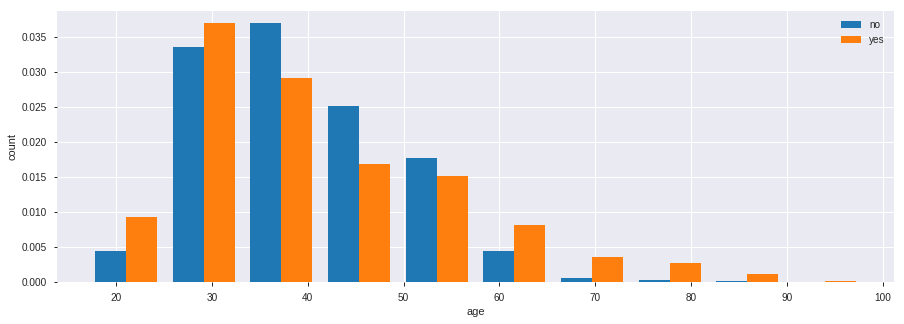

In [100]:
plt.figure(figsize=(15, 5))
plt.hist(
    [data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]]],
    label=['no', 'yes'],
    density=True
)
plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Как-то смотрится не очень.

Возможно, если наложить одну гистограмму на другую, то будет получше:

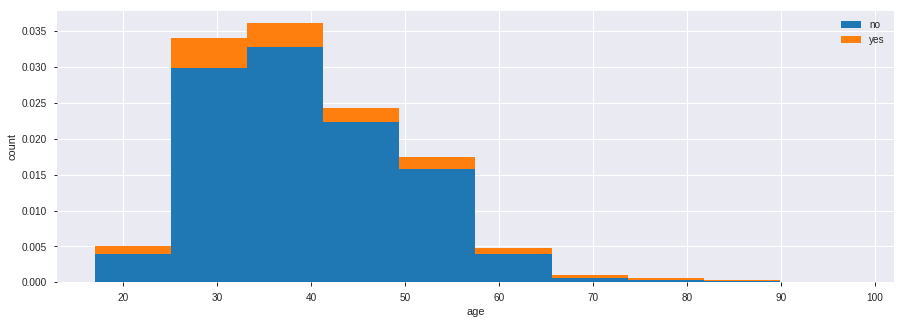

In [117]:
plt.figure(figsize=(15, 5))
plt.hist(
    [data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]]],
    label=['no', 'yes'],
    density=True,
    stacked=True
)
plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Глянем на них еще по отдельности, поскольку все равно еще как-то не особо понятно, как они (распределения) друг с другом соотносятся:

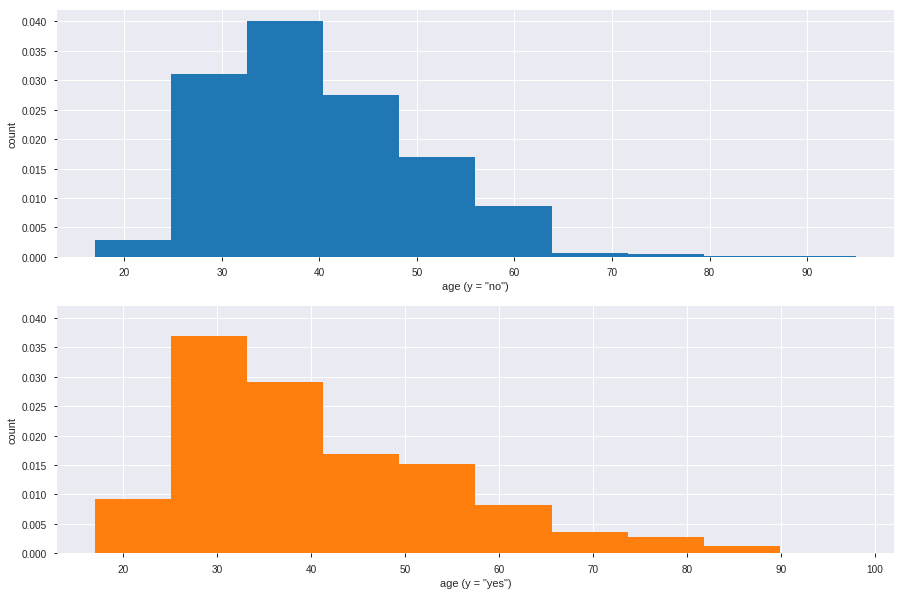

In [120]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(15, 10))
ax1.hist(data[data.y == 'no'][continuous_features[0]],
    label='no',
    density=True,
    stacked=True,
    color='tab:blue'
)
ax1.set_xlabel('age (y = "no")')
ax1.set_ylabel('count')
ax2.hist(
    data[data.y == 'yes'][continuous_features[0]],
    label='yes',
    density=True,
    stacked=True,
    color='tab:orange'
)
ax2.set_xlabel('age (y = "yes")')
ax2.set_ylabel('count')
plt.show()

Так, вроде бы, получше.

По крайней мере видно, что моды распределений смещены в разные стороны, да и в целом гистограммы по виду друг от друга отличаются.

Можно еще попробовать посчитать каког-нибудь Колмогорова-Смирнова тест, чтобы глянуть, взяты ли эти выборки из одного распределения:

In [96]:
scipy.stats.ks_2samp(data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]])

Ks_2sampResult(statistic=0.08608700226060761, pvalue=4.978090371581271e-27)

Здесь p-value получилось мизерным, что позволяет довольно твердо отвергать нулевую гипотезу о том, что эти выборки были взяты из одного распределения.

Глянем еще на то, как соотносятся средние значения в группах клиентов с положительным и отрицательным ответом:

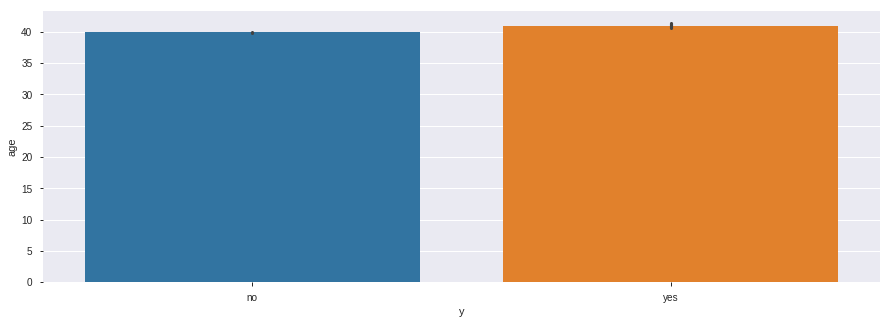

In [68]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[0], data=data)
plt.show()

Визуально они практически не отличаются.

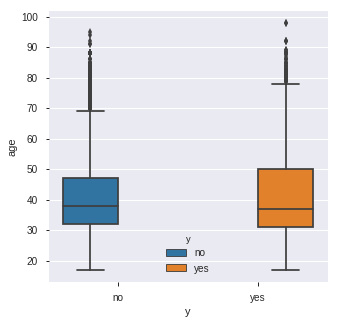

In [129]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', y=continuous_features[0], hue='y', data=data)
plt.show()

#### Campaign

Как и для возраста, та же история, сначала протсо глянем на распределение, потом на распределения в группах и т.д.

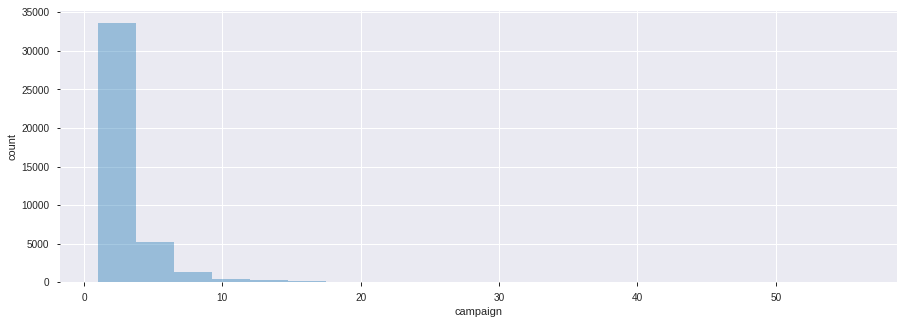

In [124]:
plt.figure(figsize=(15, 5))
sns.distplot(data[continuous_features[1]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

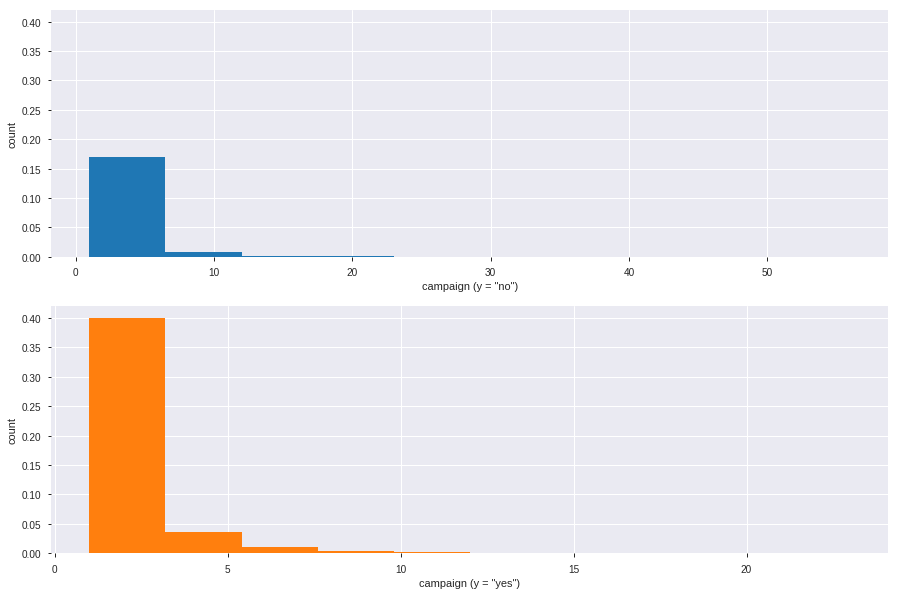

In [131]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(15, 10))
ax1.hist(data[data.y == 'no'][continuous_features[1]],
    label='no',
    density=True,
    stacked=True,
    color='tab:blue'
)
ax1.set_xlabel('campaign (y = "no")')
ax1.set_ylabel('count')
ax2.hist(
    data[data.y == 'yes'][continuous_features[1]],
    label='yes',
    density=True,
    stacked=True,
    color='tab:orange'
)
ax2.set_xlabel('campaign (y = "yes")')
ax2.set_ylabel('count')
plt.show()

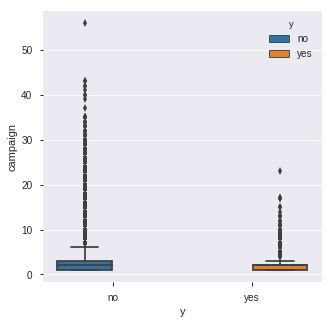

In [132]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', y=continuous_features[1], hue='y', data=data)
plt.show()

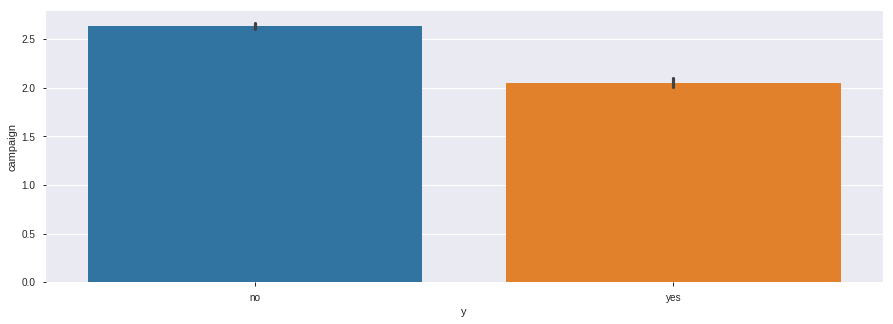

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[1], data=data)
plt.show()

#### Consumer confidence index

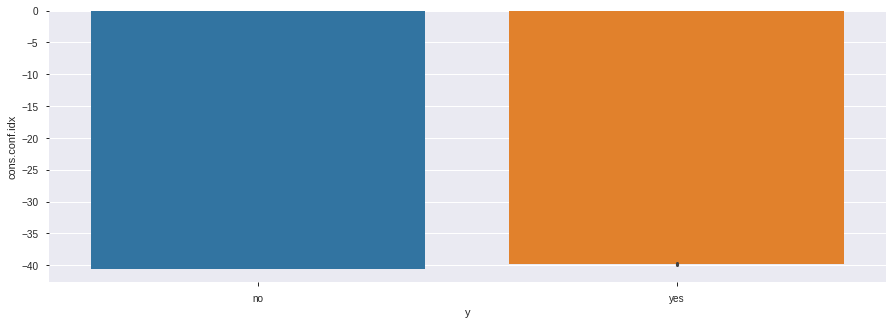

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[2], data=data)
plt.show()

#### Consumer price index

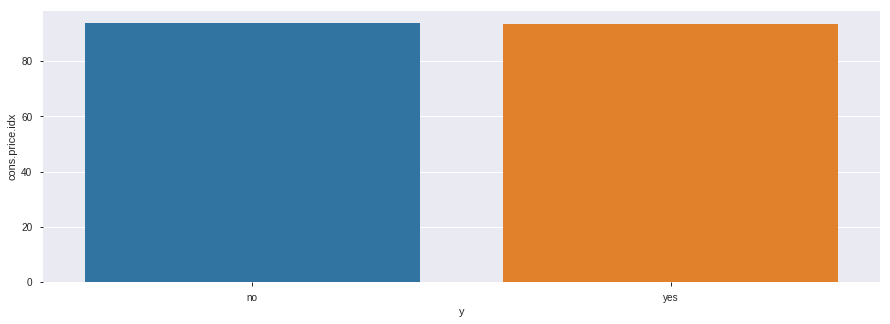

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[3], data=data)
plt.show()

#### Duration

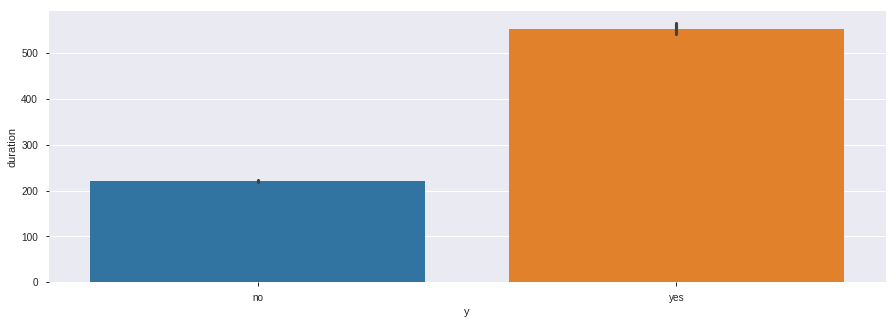

In [72]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[4], data=data)
plt.show()

#### Employment variation rate

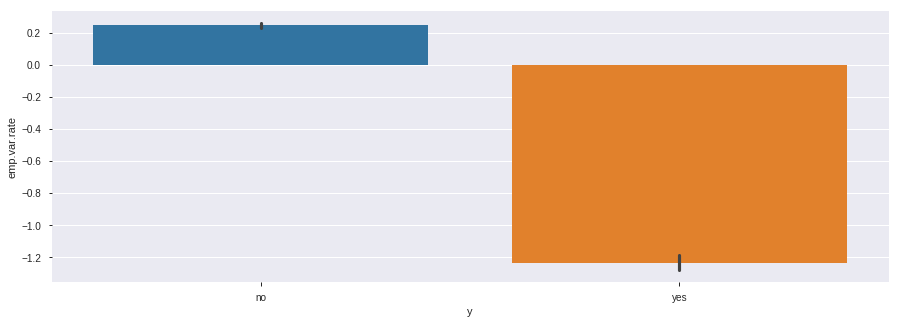

In [73]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[5], data=data)
plt.show()

#### Number of days that passed by after the client was last contacted from a previous campaign

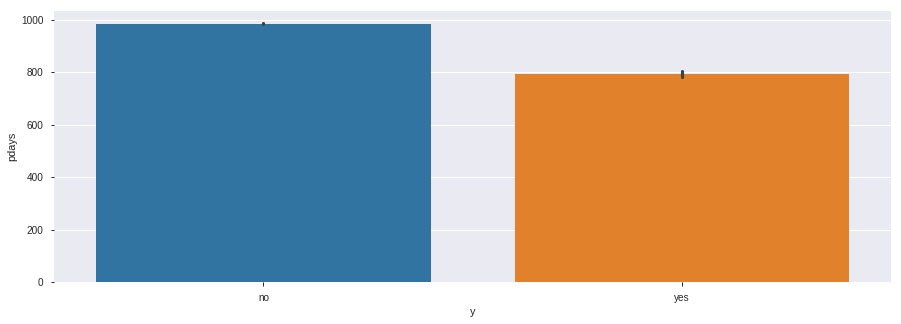

In [74]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[6], data=data)
plt.show()

#### Number of contacts performed before this campaign and for this client

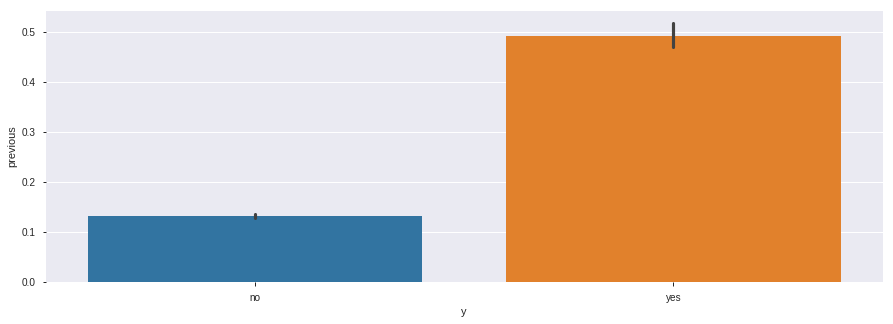

In [75]:
plt.figure(figsize=(15, 5))
sns.barplot(x='y', y=continuous_features[7], data=data)
plt.show()

### Discrete features

# Multivariate analysis

## Pair plots

## Different correlation coefficients

## FaceGrid

## CatPlot

# Conclusion